pytorch KMNIST 数据集神经网络搭建及训练

In [1]:
# 导入相关依赖包
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchvision.transforms.v2 import ToTensor

In [2]:
# 超参数定义
LR = 0.01 # 学习率
BATCH_SIZE = 128 # 数据批量大小
EPOCHS = 60 # 训练轮数

In [4]:
# 数据准备
data_train = datasets.KMNIST(
    root='../dataset',
    download=True,
    train=True,
    transform=ToTensor(),
)
data_test = datasets.KMNIST(
    root='../dataset',
    download=True,
    train=False,
    transform=ToTensor(),
)

D:\Anaconda3-2020\anaconda\envs\pytorch_study\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [5]:
# 数据批量化加载
train_loader = DataLoader(data_train, batch_size=BATCH_SIZE, shuffle=True) # shuffle=true 随机打乱数据，增肌模型训练结果的泛化能力
test_loader = DataLoader(data_test, batch_size=BATCH_SIZE, shuffle=True)

In [18]:
# 模型构建
model = torch.nn.Sequential(
    # 将图片转换为 shape(, 784) 输入项 784个特征， 神经元数量 128
    nn.Linear(in_features=28 * 28, out_features=256),
    # 使用RELU 损失函数
    nn.ReLU(),
    # 将图片转换为 shape(, 784) 输入项 784个特征， 神经元数量 128
    nn.Linear(in_features=256, out_features=128),
    # 使用RELU 损失函数
    nn.ReLU(),
    # 输出层，输入128个特征，输出 10个类别的预测值
    nn.Linear(in_features=128, out_features=10)
)

In [19]:
# 定义损失函数
loss_function = nn.CrossEntropyLoss() # 使用交叉熵损失

In [20]:
# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9, nesterov=True)

epoch 0, loss 0.4987006187438965
epoch 1, loss 0.3712400197982788
epoch 2, loss 0.3737654387950897
epoch 3, loss 0.4436780512332916
epoch 4, loss 0.10842486470937729
epoch 5, loss 0.1465596705675125
epoch 6, loss 0.08426465839147568
epoch 7, loss 0.13561378419399261
epoch 8, loss 0.1882251501083374
epoch 9, loss 0.09242617338895798
epoch 10, loss 0.07253613322973251
epoch 11, loss 0.06093950942158699
epoch 12, loss 0.17626111209392548
epoch 13, loss 0.05684559419751167
epoch 14, loss 0.013967413455247879
epoch 15, loss 0.017444388940930367
epoch 16, loss 0.017706042155623436
epoch 17, loss 0.017030177637934685
epoch 18, loss 0.016573501750826836
epoch 19, loss 0.008473926223814487
epoch 20, loss 0.013531479984521866
epoch 21, loss 0.0036986793857067823
epoch 22, loss 0.016785411164164543
epoch 23, loss 0.004341819789260626
epoch 24, loss 0.006621031556278467
epoch 25, loss 0.002301642205566168
epoch 26, loss 0.004268976394087076
epoch 27, loss 0.004577352665364742
epoch 28, loss 0.0036

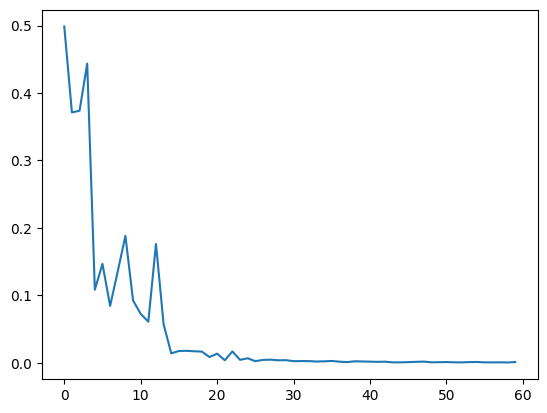

In [21]:
loss_history = []
# 开始模型训练
for epoch in range(EPOCHS):
    # 批量加载训练数据
    for images, labels in train_loader:
        # 前向计算
        out = model(images.reshape(-1, 28 * 28))
        # 计算损失
        loss = loss_function(out, labels)
        # 梯度计算
        optimizer.zero_grad() # 参数累计梯度清零（重置所有模型参数的梯度）
        loss.backward() # 反向传播计算梯度
        # 更新参数
        optimizer.step()
    loss_history.append(loss.item())
    print(f'epoch {epoch}, loss {loss.item()}')

# 绘制损失与训练轮数的变化
plt_x = range(0, EPOCHS, 1)
plt.plot(plt_x, loss_history)
plt.show()
# 保存模型参数（路径推荐使用.pt或.pth后缀）
torch.save(model, 'model_complete.pt')

In [22]:
# 测试
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data.reshape(-1, 28 * 28))
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += predicted.eq(target.data).sum().item()
    print(f'accuracy {100 * correct / total:.2f}%')

accuracy 89.97%
